# The Time-Dependent Schrodinger Equation



The Time Dependent Schrodinger Equation (in a position basis with infinite boundaries) is 

$$ i \hbar \frac{\partial}{\partial t} \psi(x,t) = -\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2}\psi(x,t) + V(x) \psi(x,t) \hspace{20mm} \psi(0, t) = \psi(L,t)=0 $$

We don't need to deal with extra parameters like $m$, $\hbar$, etc. Multiplying both sides by $mL^2$ where $L$ is the characteristic length of the problem (here we are bounded in length $L$)

$$ i mL^2 \hbar \frac{\partial}{\partial t} \psi = -\frac{1}{2}\hbar^2 L^2\frac{\partial^2}{\partial x^2}\psi + mL^2V(x) \psi $$

Now choose the convention $\hbar=1$ (So Joules=1/Seconds) and make the transformation

* $x'=\frac{x}{L}$
* $t' = \frac{t}{mL^2}$
* $V' = mL^2V$

You can check that with the convention $\hbar=1$, all of the three quantities above are dimensionless. The Schrodinger equation with respect to these three variables becomes

$$ i \frac{\partial}{\partial t'} \psi = -\frac{1}{2}\frac{\partial^2}{\partial x'^2}\psi + V'(x) \psi $$

We solve this equation for $x'$ and $t'$ and then solve for $x$ and $t$ using 

* $x = Lx'$
* $t = (mL^2) t'$
* $V = (mL^2)^{-1} V'$

**For all the numerical work we will drop the primes on $x'$, $t'$, and $V'$ but know that we are working with the primed quantities**

## 1st Technique : finite diff

Find the $\psi_j$ and $E_j$'s that satisfy

$$ -\frac{1}{2}\frac{\partial^2}{\partial x^2}\psi + V(x) \psi = E\psi$$

rearranging:
$$\psi_{j}^{m+1} = \psi_j^m + \frac{i}{2}\frac{\Delta t}{\Delta x^2}\left(\psi_{j+1}^{m} -2\psi_j^m + \psi_{j-1}^{m}\right) - i \Delta tV(x)\psi_j^m$$ 

## 2nd technique: Eigenstates evolution 

Find the $\psi_j$ and $E_j$'s that satisfy

$$ -\frac{1}{2}\frac{\partial^2}{\partial x^2}\psi + V(x) \psi = E\psi$$
And then

$$\psi(x,t) = \sum_{j=0}^\infty c_j \psi_j(x) e^{-i E_j t} \hspace{20mm} c_j = \int_{-\infty}^{\infty} \psi(x, 0)\psi_j^*(x) dx$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import PillowWriter
import numba
from numba import jit
from scipy.linalg import eigh_tridiagonal
plt.style.use(['science', 'notebook','grid'])


In [2]:
#technique 1
Nx= 301
Nt=100000
dx = 1/(Nx-1)
dt=1e-7
x=np.linspace(0,1,Nx)
psi0=np.sqrt(2)*np.sin(np.pi*x)
mu, sigma = 1/2, 1/20
V=-1e4*np.exp(-(x-mu)**2/(2*sigma**2))

In [3]:
#make sure that is normalize
np.sum(np.abs(psi0)**2)*dx

1.0

In [4]:
#For the finite difference method this has to be small 
dt/dx**2

0.008999999999999998

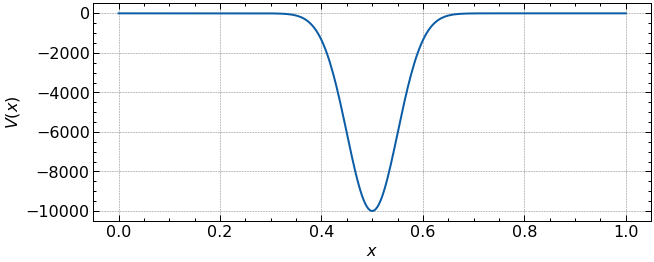

In [5]:
plt.figure(figsize=(10,4))
plt.plot(x,V)
plt.xlabel('$x$')
plt.ylabel('$V(x)$')
plt.show()

In [6]:
V[150], V[30]

(-10000.0, -1.2664165549094174e-10)

In [7]:
#construct the array of psi(x,t)
psi=np.zeros([Nt,Nx])
psi[0]=psi0
psi

array([[0.00000000e+00, 1.48093391e-02, 2.96170542e-02, ...,
        2.96170542e-02, 1.48093391e-02, 1.73191211e-16],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [8]:
@numba.jit("c16[:,:](c16[:,:])", nopython=True, nogil=True)
def compute_psi(psi):
    for t in range(0, Nt-1):
        for i in range(1, Nx-1):
            psi[t+1][i] = psi[t][i] + 1j/2 * dt/dx**2 * (psi[t][i+1] - 2*psi[t][i] + psi[t][i-1]) - 1j*dt*V[i]*psi[t][i]
        
        normal = np.sum(np.absolute(psi[t+1])**2)*dx
        for i in range(1, Nx-1):
            psi[t+1][i] = psi[t+1][i]/normal
        
    return psi

In [9]:
#So psi(x,t)
psi_m1=compute_psi(psi.astype(complex))

In [10]:
psi_m1[-1]

array([ 0.        +0.00000000e+00j,  0.01190853-1.59796972e-03j,
        0.02382233-3.19777260e-03j,  0.03574733-4.80030408e-03j,
        0.04769063-6.40456551e-03j,  0.05966119-8.00699292e-03j,
        0.07167006-9.60066693e-03j,  0.08373091-1.11750884e-02j,
        0.09585991-1.27156248e-02j,  0.10807608-1.42037412e-02j,
        0.12040067-1.56167055e-02j,  0.13285727-1.69281325e-02j,
        0.1454709 -1.81080023e-02j,  0.15826769-1.91233828e-02j,
        0.17127397-1.99388420e-02j,  0.18451553-2.05173568e-02j,
        0.19801687-2.08211592e-02j,  0.21180022-2.08129464e-02j,
        0.22588513-2.04570962e-02j,  0.24028729-1.97212335e-02j,
        0.25501858-1.85776222e-02j,  0.27008598-1.70049450e-02j,
        0.28549193-1.49896019e-02j,  0.30123358-1.25273588e-02j,
        0.31730336-9.62430618e-03j,  0.33368884-6.29797270e-03j,
        0.35037341-2.57778730e-03j,  0.36733675+1.49460609e-03j,
        0.38455579+5.86546597e-03j,  0.40200561+1.04694608e-02j,
        0.41966065+1.5230

Plotting for some given $m=10000$ (dimensionless time is $m\Delta t$Z)

0.9999999997747605

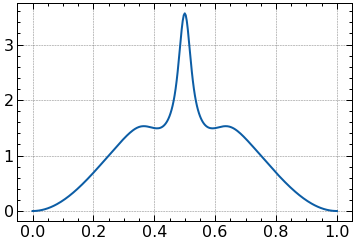

In [11]:
plt.plot(x, np.absolute(psi_m1[5000])**2)
np.sum(np.abs(psi_m1[5000])**2)*dx

## 2nd tech: 
First thing to do is solving the stationary shcro and then evolution with eig

In [12]:
Nx=301
dx=1/(Nx-1)
x=np.linspace(0,1,Nx)
psi_0= np.sqrt(2)*np.sin(np.pi*x)

def V(x):
    mu, sigma = 1/2, 1/20
    return -1e4*np.exp(-(x-mu)**2/(2*(sigma)**2))

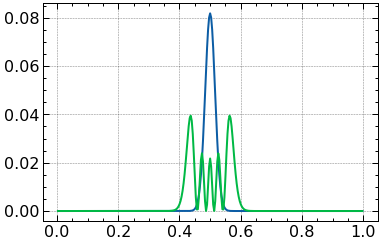

In [13]:
d = 1/dx**2 +V(x)[1:-1]
e= -1/(2*dx**2) *np.ones(len(d)-1)
w, v =eigh_tridiagonal(d,e)
plt.plot(x[1:-1],v.T[0]**2)
plt.plot(x[1:-1],v.T[4]**2)

In [14]:
len(d)

299

In [15]:
len(V(x))   #due to the boundaries conditions (2 csntns)

301

In [16]:
E_js=w[0:70]
psi_js = np.pad(v.T[0:70], [(0,0),(1,1)], mode='constant') #add 0 and 0 1 time each at the end and the begi
cs=np.dot(psi_js,psi0)  #no dx bec they're normalised


In [17]:
len(psi_js[0]),len(psi0)


(301, 301)

In [18]:
len(v.T[0:70])

70

In [19]:
len(v.T[0:70][0])

299

In [20]:
len(cs),cs

(70,
 array([ 7.04851271e+00,  3.70220669e-14,  5.53133639e+00, -5.90907914e-14,
         5.60518017e+00,  1.71899950e-13,  6.93069456e+00,  1.65672408e-13,
         1.13408423e+01,  1.70910789e-11, -3.18243876e+00, -7.58351708e-13,
         1.15992241e+00,  1.83063851e-13, -4.04572360e-01, -6.02383880e-13,
        -9.94144265e-02, -2.50640233e-13,  1.83001487e-02,  2.03442384e-13,
         5.30480440e-02,  9.57854447e-14,  5.26414377e-02,  9.86978449e-14,
        -4.03039016e-02, -1.09975761e-13, -2.67317834e-02, -1.56874334e-13,
        -1.59433356e-02, -5.98937536e-14, -8.66284571e-03, -3.43108662e-14,
         4.28660399e-03, -3.14238366e-14,  1.90371293e-03, -5.13435662e-14,
        -7.27225518e-04,  2.06992676e-14, -2.08378131e-04, -3.98487701e-14,
        -1.31795383e-05, -1.91573537e-14,  4.04492207e-05,  5.05725877e-14,
        -4.17353370e-05,  9.81297857e-15,  2.93394079e-05, -3.43649265e-14,
         1.72743016e-05,  4.35058196e-14, -8.98988263e-06,  1.07888888e-14,
       

In [21]:
def psi_m2(t):
    return psi_js.T@(cs*np.exp(-1j*E_js*t))
np.shape(psi_js),np.shape(cs)


((70, 301), (70,))

array([[0.00000000e+00, 1.48093391e-02, 2.96170542e-02, ...,
        2.96170542e-02, 1.48093391e-02, 1.73191211e-16],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

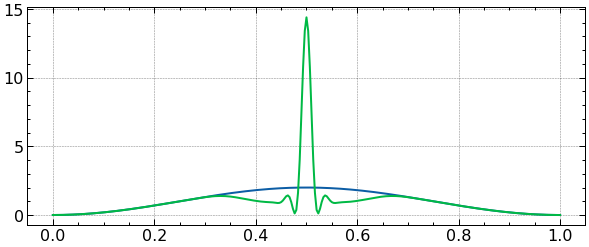

In [22]:
plt.figure(figsize=(10,4))
plt.plot(x,psi0**2)
plt.plot(x, np.abs(psi_m2(10000*dt))**2)

psi

###  Animation

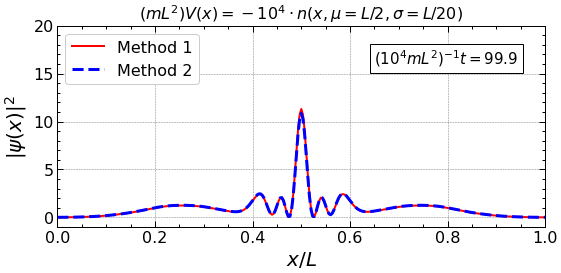

In [23]:
def animate(i):
    ln1.set_data(x, np.absolute(psi_m1[100*i])**2)
    ln2.set_data(x, np.absolute(psi_m2(100*i*dt))**2)
    time_text.set_text('$(10^4 mL^2)^{-1}t=$'+'{:.1f}'.format(100*i*dt*1e4))
    
fig, ax = plt.subplots(1,1, figsize=(8,4))
#ax.grid()
ln1, = plt.plot([], [], 'r-', lw=2, markersize=8, label='Method 1')
ln2, = plt.plot([], [], 'b--', lw=3, markersize=8, label='Method 2')
time_text = ax.text(0.65, 16, '', fontsize=15,
           bbox=dict(facecolor='white', edgecolor='black'))
ax.set_ylim(-1, 20)
ax.set_xlim(0,1)
ax.set_ylabel('$|\psi(x)|^2$', fontsize=20)
ax.set_xlabel('$x/L$', fontsize=20)
ax.legend(loc='upper left')
ax.set_title('$(mL^2)V(x) = -10^4 \cdot n(x, \mu=L/2, \sigma=L/20)$')
plt.tight_layout()
ani = animation.FuncAnimation(fig, animate, frames=1000, interval=50)
ani.save('tds.gif',writer='pillow',fps=50,dpi=100)

In [24]:
animation.FuncAnimation

matplotlib.animation.FuncAnimation